In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../DATA/bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# EDA

<AxesSubplot:xlabel='age', ylabel='Count'>

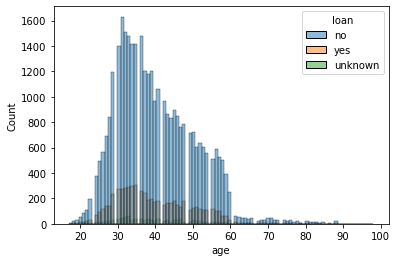

In [6]:
sns.histplot(data=df, x='age', hue='loan')

<AxesSubplot:xlabel='loan', ylabel='count'>

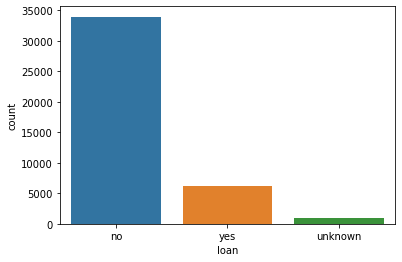

In [7]:
sns.countplot(data=df, x='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

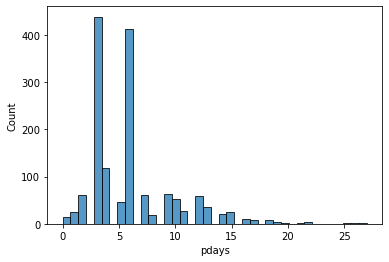

In [8]:
sns.histplot(data=df[df['pdays']!=999], x='pdays')

In [9]:
df['duration']


0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

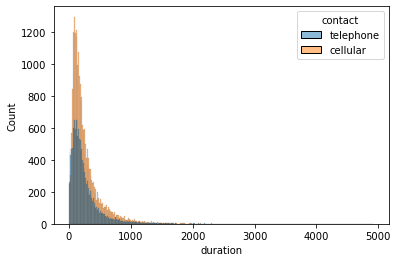

In [10]:
sns.histplot(data=df, x='duration', hue='contact')

<AxesSubplot:xlabel='contact', ylabel='count'>

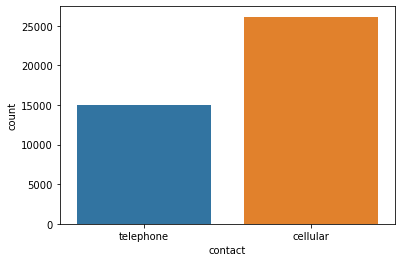

In [11]:
sns.countplot(data=df, x='contact')

In [12]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

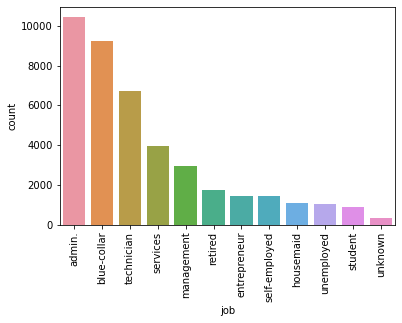

In [13]:
sns.countplot(data=df, x='job',order=['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'])
plt.xticks(rotation=90);

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Data preparation,creating model and fitting kmeans model 

In [16]:
X=pd.get_dummies(df)

In [17]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
scaled_X=scaler.fit_transform(X)

In [21]:
from sklearn.cluster import KMeans

In [23]:
# help(KMeans)

In [24]:
model = KMeans(n_clusters=2)

In [31]:
cluster_labels=model.fit_predict(scaled_X)

In [32]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
X['Cluster']=cluster_labels
X=X.drop('Clusyer', axis=1)

<AxesSubplot:>

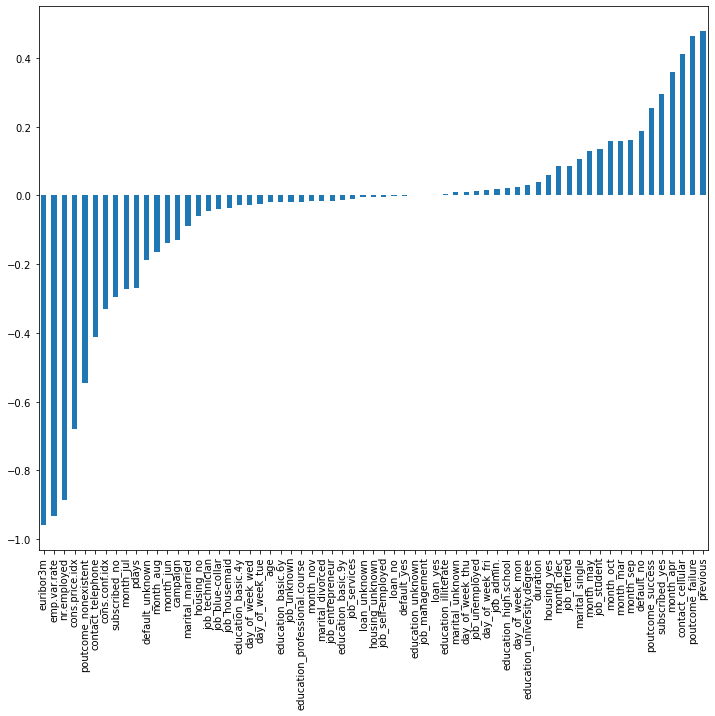

In [59]:
plt.figure(figsize=(12,10))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Deciding K value

In [69]:
ssd = []

for k in range(2, 10):
    model=KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    
    ssd.append(model.inertia_) #SSD

In [70]:
ssd

[2469792.367302056,
 2370786.859832915,
 2271503.315605034,
 2200693.915922881,
 2174946.465922867,
 2113325.2729849853,
 2047944.197929244,
 2000592.8630060584]

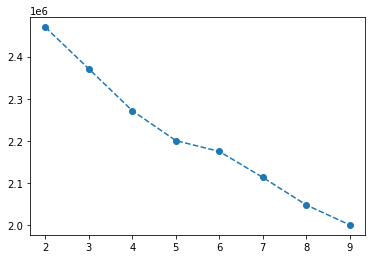

In [71]:
plt.plot(range(2, 10), ssd, 'o--')

In [74]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.200694e+06
4    2.174946e+06
5    2.113325e+06
6    2.047944e+06
7    2.000593e+06
dtype: float64

In [75]:
pd.Series(ssd).diff()

0             NaN
1   -99005.507469
2   -99283.544228
3   -70809.399682
4   -25747.450000
5   -61621.192938
6   -65381.075056
7   -47351.334923
dtype: float64